##  Mall Customer Segmentation using K-Means Clustering

Objective:
Segment mall customers based on their annual income and spending behavior to help businesses design targeted marketing strategies.


##  Dataset Overview

The dataset contains customer demographic and spending information:
- CustomerID
- Gender
- Age
- Annual Income (k$)
- Spending Score (1–100)

Goal:
Identify natural customer groups using unsupervised learning.

In [44]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [46]:
df = pd.read_csv("Mall_Customers.csv")

In [48]:
df.shape

(200, 5)

In [50]:
df.drop(columns="CustomerID",inplace=True)

In [52]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [54]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


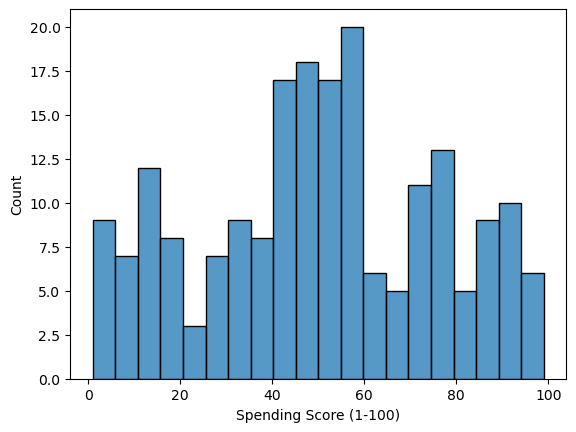

In [56]:
sns.histplot(df["Spending Score (1-100)"],bins=20)
plt.show()

In [57]:
df["Gender"].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [60]:
x = df[["Annual Income (k$)","Spending Score (1-100)"]]

In [62]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [64]:
wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

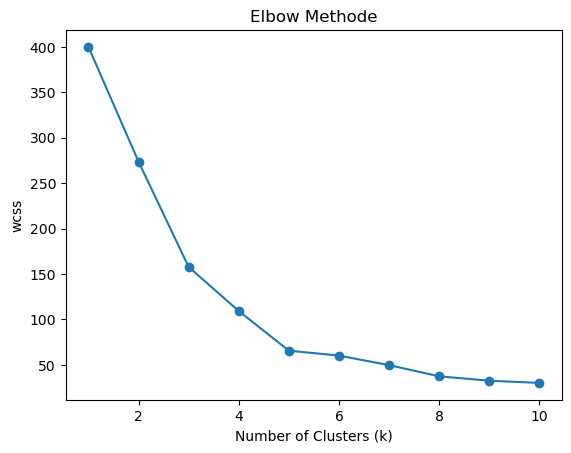

In [66]:
plt.plot(range(1,11),wcss ,marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("wcss")
plt.title("Elbow Methode")
plt.show()

The Elbow Method helps determine the optimal number of clusters.
As the number of clusters increases, the inertia (within-cluster sum of squares) decreases.
The point where the curve starts flattening indicates the best number of clusters.
In this project, k = 5 was selected as the optimal cluster number.


In [69]:
kmeans = KMeans(n_clusters=5 , random_state=42)
clusters = kmeans.fit_predict(x_scaled)

df["Cluster"] = clusters

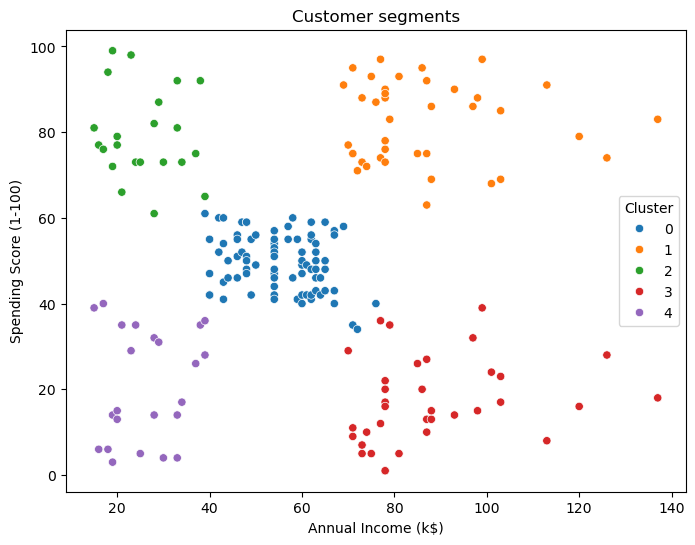

In [71]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df["Annual Income (k$)"],
    y=df["Spending Score (1-100)"],
    hue=df["Cluster"],
    palette="tab10"
)
plt.title("Customer segments")
plt.show()

In [72]:
df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()


,Annual Income (k$),Spending Score (1-100)
Cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


This table summarizes the average behavior of each cluster, helping convert model output into business insights.


In [76]:
from sklearn.metrics import silhouette_score

score = silhouette_score(x_scaled, clusters)
print("Silhouette Score:", score)


Silhouette Score: 0.5546571631111091


In [ ]:
import plotly.express as px

fig = px.scatter_3d(df,
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    z="Cluster",
    color="Cluster",
    symbol="Cluster",
    size_max=10,
    opacity=0.8,
    title="Mall Customer Segmentation (3D)"
)

fig.show()


##  3D Cluster Visualization Explanation

Each point represents a customer.
Customers are grouped into different clusters based on income and spending behavior.
Different colors show different customer segments.
This helps understand customer patterns for marketing decisions.
